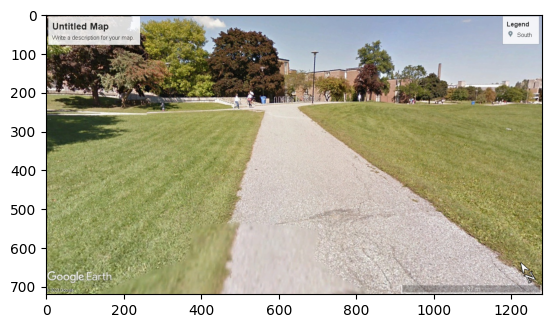

In [2]:
# import dependencies
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display, Javascript, Image

from base64 import b64decode, b64encode
import PIL
import io
import html
import time
image = cv2.imread('./Sidewalks/P15.jpg',cv2.IMREAD_UNCHANGED)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

<Figure size 2000x2000 with 0 Axes>

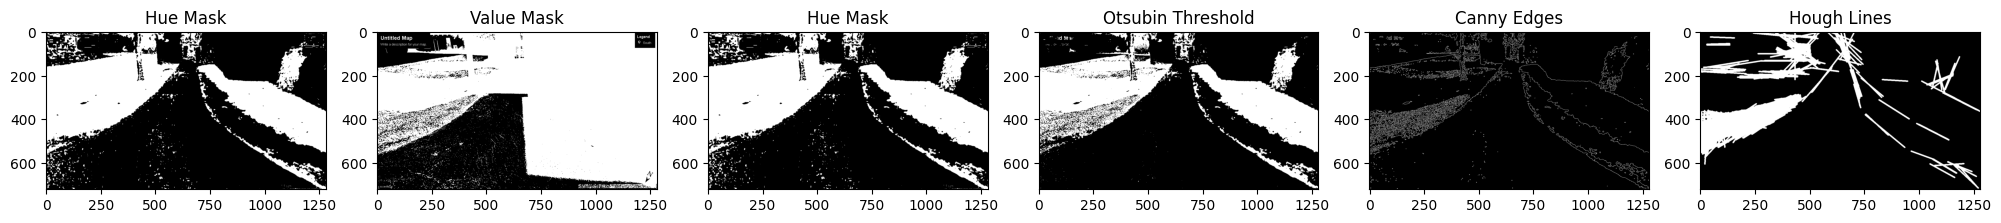

In [5]:
# Read the IMage
image = cv2.imread('./Sidewalks/P1.jpg',cv2.IMREAD_UNCHANGED)

# Convert BGR image to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Splitting the HSV image into its components
h, s, v = cv2.split(hsv)

# Define lower and upper thresholds for value segmentation
lower_value_threshold = 0
upper_value_threshold = 150 

# Define lower and upper thresholds for value segmentation
lower_hue_threshold = 30
upper_hue_threshold = 90 

# Create a binary mask based on value thresholds
value_mask = cv2.inRange(v, lower_value_threshold, upper_value_threshold)

# Create a binary mask based on hue thresholds
hue_mask = cv2.inRange(h, lower_hue_threshold, upper_hue_threshold)

# Combine the value and hue mask
composite_mask = cv2.bitwise_and(value_mask, hue_mask)

# Apply the mask to the original image to remove shadows
segmented_image = cv2.bitwise_and(image, image, mask=composite_mask) 

# Convert Image to Grayscale
img_gry = cv2.cvtColor(segmented_image,cv2.COLOR_BGR2GRAY)

# Equalize the contrast of the image
equalized = cv2.equalizeHist(img_gry)

# Apply Gaussian blurring
img_blur = cv2.GaussianBlur(equalized, (5,5), 0) 

# Apply Otsubin thresholding
ret, img_Otsubin = cv2.threshold(img_gry,10,255,cv2.THRESH_BINARY)

imagetocanny = img_Otsubin

edges = cv2.Canny(image=imagetocanny, threshold1=200, threshold2=200) # Canny Edge Detection


'''
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 100  # minimum number of pixels making up a line
max_line_gap = 30  # maximum gap in pixels between connectable line segments
line_image = np.copy(img_Otsubin) * 0  # creating a blank to draw lines on
'''

line_image = np.copy(img_Otsubin) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image. Output lines are an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, 1, np.pi/100, 15, np.array([]),
                    100, 30)

for line in lines:
    for x1,y1,x2,y2 in line:
      cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
plt.figure(figsize = (20,20))


plt.figure(figsize=(20, 5))


plt.subplot(1, 6, 1)
plt.imshow(hue_mask, cmap='gray')
plt.title('Hue Mask')

plt.subplot(1, 6, 2)
plt.imshow(value_mask, cmap='gray')
plt.title('Value Mask')

plt.subplot(1, 6, 3)
plt.imshow(hue_mask, cmap='gray')
plt.title('Hue Mask')

plt.subplot(1, 6, 4)
plt.imshow(img_Otsubin, cmap='gray')
plt.title('Otsubin Threshold')

plt.subplot(1, 6, 5)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')

plt.subplot(1, 6, 6)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Lines')

plt.tight_layout()
plt.show()



Shape/Size of RGB Img: (720, 1280) (720, 1280)


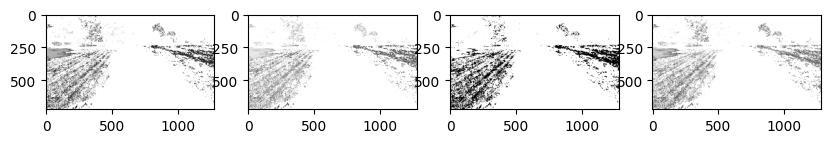

In [228]:
# Convert Image to grayscale
img_gry = cv2.cvtColor(segmented_image,cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(img_gry)


# Apply Gaussian blurring
img_blur = cv2.GaussianBlur(equalized, (5,5), 0) 

# Apply Otsubin thresholding
ret, img_Otsubin = cv2.threshold(img_blur,10,255,cv2.THRESH_OTSU)
print('Shape/Size of RGB Img:', img_gry.shape, img_Otsubin.shape)

added_image = img_blur + equalized
plt.figure(figsize = (10,10))
plt.subplot(1, 4, 1)
plt.imshow(img_gry,cmap='binary')
plt.subplot(1, 4, 2)
plt.imshow(equalized,cmap='binary')
plt.subplot(1, 4, 3) 
plt.imshow(img_Otsubin,cmap='binary') # 3 is the one!
plt.subplot(1, 4, 4)
plt.imshow(added_image,cmap='binary')

imagetocanny = img_Otsubin


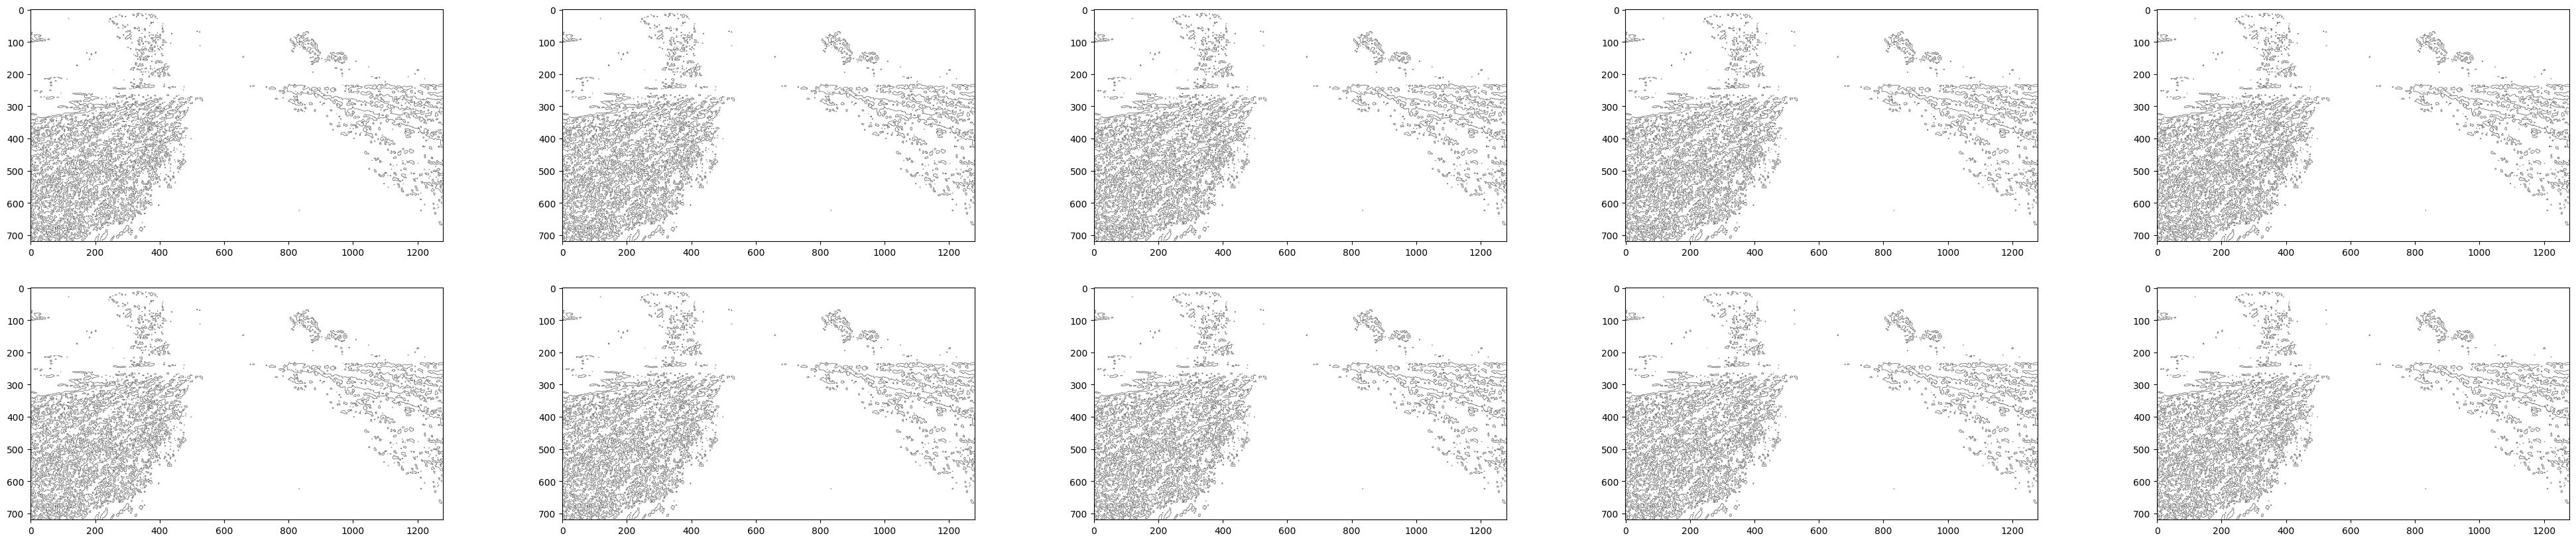

In [229]:
edges1 = cv2.Canny(image=imagetocanny, threshold1=50, threshold2=200) # Canny Edge Detection
edges2 = cv2.Canny(image=imagetocanny, threshold1=75, threshold2=200) # Canny Edge Detection
edges3 = cv2.Canny(image=imagetocanny, threshold1=100, threshold2=200) # Canny Edge Detection
edges4 = cv2.Canny(image=imagetocanny, threshold1=150, threshold2=200) # Canny Edge Detection
edges5 = cv2.Canny(image=imagetocanny, threshold1=200, threshold2=200) # Canny Edge Detection

edges6 = cv2.Canny(image=imagetocanny, threshold1=300, threshold2=400) # Canny Edge Detection
edges7 = cv2.Canny(image=imagetocanny, threshold1=400, threshold2=400) # Canny Edge Detection
edges8 = cv2.Canny(image=imagetocanny, threshold1=500, threshold2=400) # Canny Edge Detection
edges9 = cv2.Canny(image=imagetocanny, threshold1=750, threshold2=400) # Canny Edge Detection
edges10 = cv2.Canny(image=imagetocanny, threshold1=1000, threshold2=400) # Canny Edge Detection

plt.figure(figsize = (50,10))
plt.subplot(2, 5, 1)
plt.imshow(edges1, cmap= 'binary')
plt.subplot(2, 5, 2)
plt.imshow(edges2, cmap= 'binary')
plt.subplot(2, 5, 3)
plt.imshow(edges3, cmap= 'binary')
plt.subplot(2, 5, 4)
plt.imshow(edges4, cmap= 'binary')
plt.subplot(2, 5, 5)
plt.imshow(edges5, cmap= 'binary')
plt.subplot(2, 5, 6)
plt.imshow(edges6, cmap= 'binary')
plt.subplot(2, 5, 7)
plt.imshow(edges7, cmap= 'binary')
plt.subplot(2, 5, 8)
plt.imshow(edges8, cmap= 'binary')
plt.subplot(2, 5, 9)
plt.imshow(edges9, cmap= 'binary')
plt.subplot(2, 5, 10)
plt.imshow(edges10, cmap= 'binary')





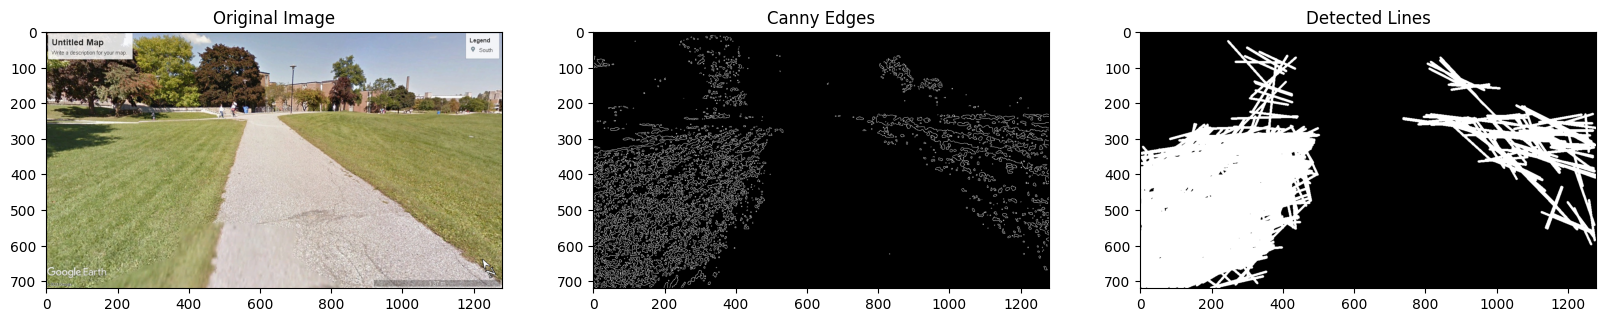

In [230]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 100  # minimum number of pixels making up a line
max_line_gap = 30  # maximum gap in pixels between connectable line segments
line_image = np.copy(img_Otsubin) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges5, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
      cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
plt.figure(figsize = (20,20))

plt.subplot(131), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(132), plt.imshow(cv2.cvtColor(edges5, cv2.COLOR_BGR2RGB)), plt.title('Canny Edges')
plt.subplot(133), plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB)), plt.title('Detected Lines')

plt.show()
